<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la

In [45]:
class TestFunction:
    def __init__(self, name: str, domain: np.ndarray, glob_min: np.ndarray, fun: callable) -> None:
        
        """_summary_

        Args:
            domain (np.ndarray): Область определения функции
            glob_min (np.ndarray): Глобальный минимум
            fun (callable): Функция
        """
        self.name = name
        self.domain = domain
        self.glob_min = glob_min
        self.fun = fun

In [46]:
class Himmelblau():
  @staticmethod
  def fuction(x):
        return (x[0] * x[0] + x[1] - 11) ** 2 + (x[0] + x[1] * x[1] - 7) ** 2

  @staticmethod
  def get_bounds():
    return np.array([[-5, -5], [5, 5]])
    
  @staticmethod
  def get_min():
        return np.array([3., 2., 0.])
  
  @staticmethod
  def gradient(x):
        return np.array([4 * x[0] * (x[0] * x[0] + x[1] - 11) + 2 * (x[0] + x[1] * x[1] - 7), 4 * x[1] * (x[1] * x[1] + x[0] - 7) + 2 * (x[1] + x[0] * x[0] - 11)])

In [47]:
class Matyas():
  @staticmethod
  def fuction(x):
        return 0.26*(x[0]*x[0] + x[1]*x[1])-0.48*x[0]*x[1]

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])
    
  @staticmethod
  def get_min():
        return np.array([0., 0., 0.])
  
  @staticmethod
  def gradient(x):
        return np.array([0.52*x[0] - 0.48 * x[1], 0.52*x[1] - 0.48 * x[0]])

In [48]:
def draw_result(fun: callable, domain: np.array, glob_min: np.array, path: np.array, title: str) -> None:

    """Визуализация градиентного спуска

    Args:
        fun (callable): Функция искуственного ландшафта
        domain (np.array): Область определения функции
        glob_min (np.array): Глобальный минимум функции
        path (np.array): История градиентного спуска
        title (str): Содержание заголовка
    """

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')
    
    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)
    
    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = fun(np.array([x_grid, y_grid]))
    
    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)    
    ax.plot(path[:, 0], path[:, 1], path[:, 2], '-o', c='black', label = 'Градиентный спуск', alpha = 0.7)
    ax.scatter3D(path[0, 0], path[0, 1], path[0, 2], s=100, c="white", lw=2, ec='black', marker = 'D', label="Начальная точка")
    ax.scatter3D(path[-1, 0], path[-1, 1], path[-1, 2], s=190, c="white", lw=2, ec='black', marker = 'X', label="Найденный минимум")
    ax.scatter3D(glob_min[0], glob_min[1], glob_min[2], s=150, c="red", lw=2, ec='black', marker = 'o', label="Глобальный минимум", alpha = 0.7)

    np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
    print(f"Начальная точка:\t{path[0]}")
    np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
    print(f"Найденный минимум:\t{path[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    print(f"Кол-во итераций:\t{len(path)}")
    fig.text(0.9, 0.1, s=f"Кол-во итераций: {len(path)}", horizontalalignment="right", fontsize = 12)

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.legend(loc="upper left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [49]:
def my_GD(
    fun: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001
    ) -> np.array:

    """Классический градиентный спуск

    Args:
        fun (callable): Функция искуственного ландшафта
        start_params (np.ndarray): Стартовый набор параметров
        glob_min (np.ndarray): Глобальный минимум рассматриваемой функции
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): Шаг обучения. Defaults to 0.1.
        delta (float, optional): Радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: История градиентного спуска
    """

    # Рассчитываем начальный набор параметров
    params = start_params.copy()
    path = [np.array([params[0], params[1], fun(params)])]
    
    step = 0
    while (step < max_iter and la.norm(path[-1] - glob_min) > delta):

        # Вычисляем новое значение параметров
        params = params - lr * grad(params)

        # Логируем результат
        path.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(path)

Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 1.23e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	247


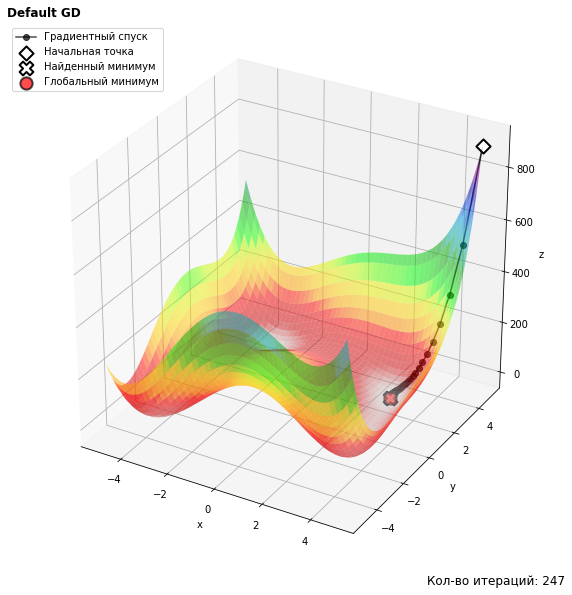

In [50]:
# Для Химмельблау
path = my_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.001)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), path, "Default GD")

Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-3.63e-02 -3.63e-02 5.28e-05]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	1001


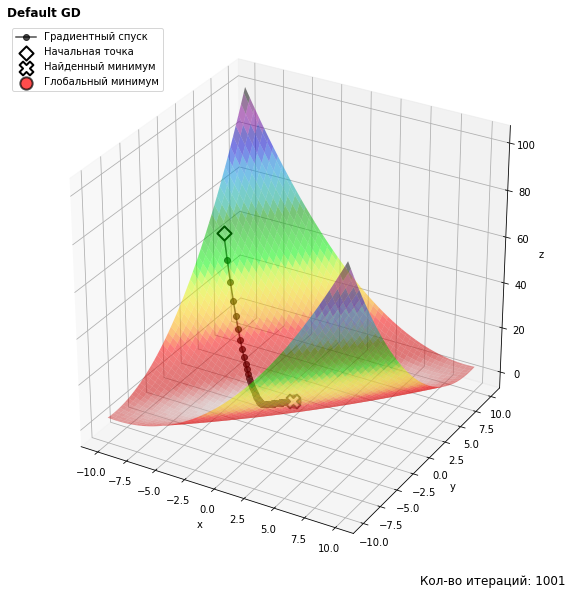

In [51]:
# Для Мак Кормика
path = my_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), path, "Default GD")

In [52]:
def inertial_GD(
    fun: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, 
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001, beta: float = 0.5
    ) -> np.array:
    
    """Инертный градиентный спуск

    Args:
        fun (callable): Функция искуственного ландшафта
        start_params (np.ndarray): Начальный набор параметров
        glob_min (np.ndarray): Глобальный минимум рассматриваемой функции
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): Шаг обучения. Defaults to 0.1.
        delta (float, optional): Радиус сходимости. Defaults to 0.001.
        beta (float, optional): Коэффициент энертности. Defaults to 0.5.

    Returns:
        np.array: История градиентного спуска
    """

    # Рассчитываем начальный набор параметров
    params_prev = start_params.copy()
    params = start_params.copy()
    path = [np.array([params[0], params[1], fun(params)])]
    
    step = 0
    while (step < max_iter and la.norm(path[-1] - glob_min) > delta):

        # Вычисляем новое значение параметров
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev = params
        params = params_new
        
        # Логируем результат
        path.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(path)

Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 1.24e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	111


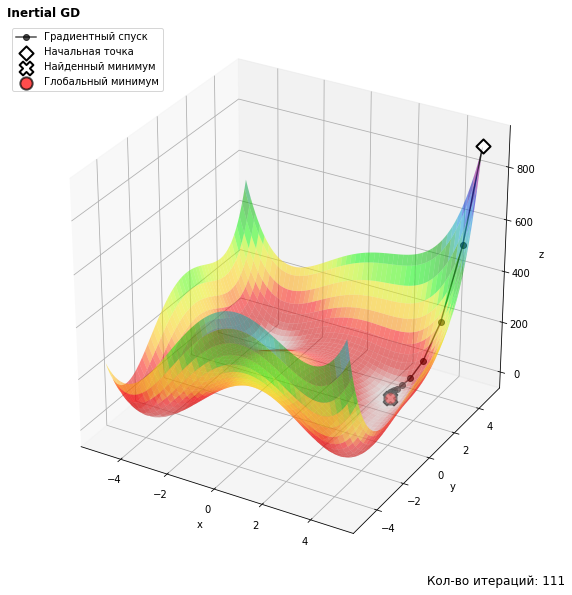

In [53]:
# Для Химмельблау
path = inertial_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.001)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), path, "Inertial GD")

Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-7.04e-04 -7.04e-04 1.98e-08]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	984


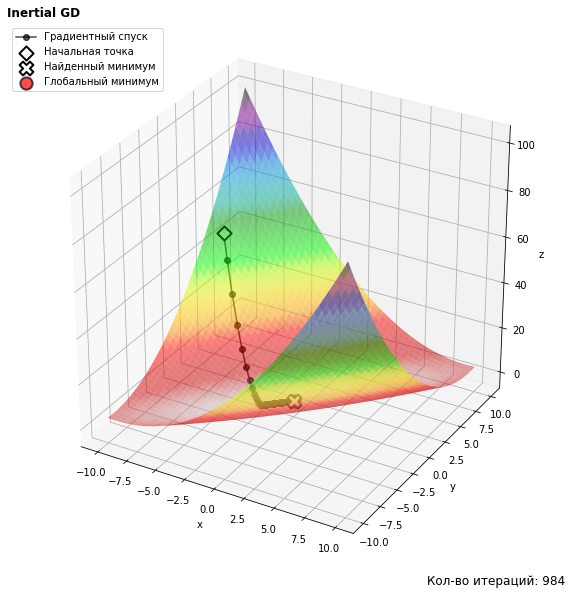

In [54]:
# Для Матьяса
path = inertial_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), path, "Inertial GD")

In [55]:
def Adam_GD(
    fun: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, max_iter: int = 1000, 
    lr: float = 0.1, b1: float = 0.6, b2: float = 0.999, e: float = 10e-8, delta: float = 0.001
    ) -> np.array:
    
    """Адаптивный градиентный спуск: Adam

    Args:
        fun (callable): Функция искуственного ландшавта
        start_params (np.ndarray): Стартовый набор параметров
        glob_min (np.ndarray): Глобальный минимум рассматриваемой функции
        max_iter (int, optional): Ограничение по кол-ву итераций. Defaults to 1000.
        lr (float, optional): Шаг обучения. Defaults to 0.1.
        b1 (float, optional): Параметр beta1. Defaults to 0.6.
        b2 (float, optional): Параметр beta2. Defaults to 0.999.
        e (float, optional): "Бесконечно малое" число. Defaults to 10e-8.
        delta (float, optional): Радиус сходимости. Defaults to 0.001.

    Returns:
        np.array: История градиентного спуска
    """

    # Рассчитываем начальный набор параметров
    params = start_params.copy()
    path = [np.array([params[0], params[1], fun(params)])]

    # Инициализируем первый и второй моменты
    m = np.array([0, 0])
    v = np.array([0, 0])
    
    step = 0
    while (step < max_iter and la.norm(path[-1] - glob_min) > delta):
        
        # Считаем первый первый и второй моменты
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2

        # Вычисляем новое значение параметров
        params = params - lr * m / (np.sqrt(v) + e)
        
        # Логируем результат
        path.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(path)

Начальная точка:	[5.00 5.00 890.00]
Найденный минимум:	[3.00e+00 2.00e+00 2.80e-05]
Глобальный минимум:	[3.00e+00 2.00e+00 0.00e+00]
Кол-во итераций:	32


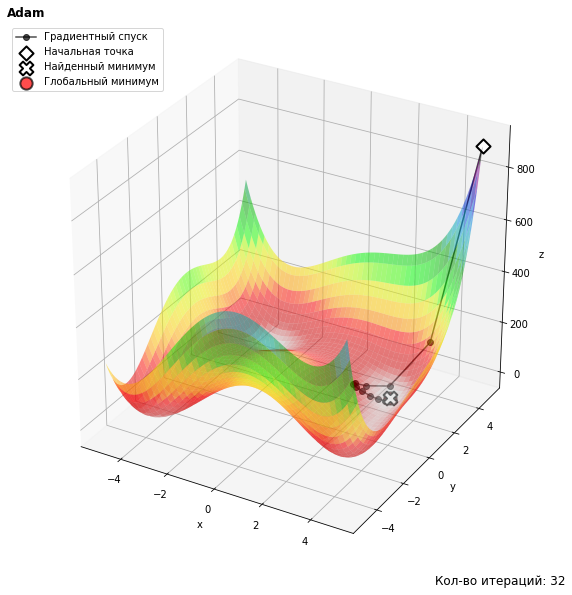

In [56]:
# Для Химмельблау
path = Adam_GD(Himmelblau.fuction, Himmelblau.gradient, np.array([5,5]), Himmelblau.get_min(), max_iter = 1000, lr = 0.1)
draw_result(Himmelblau.fuction, Himmelblau.get_bounds(), Himmelblau.get_min(), path, "Adam")

Начальная точка:	[-9.00 5.00 49.16]
Найденный минимум:	[-6.99e-04 -6.98e-04 1.95e-08]
Глобальный минимум:	[0.00e+00 0.00e+00 0.00e+00]
Кол-во итераций:	575


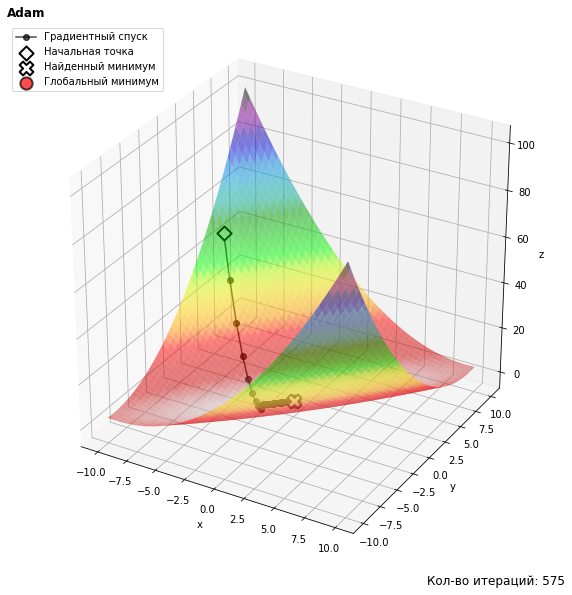

In [57]:
# Для Матьяса
path = Adam_GD(Matyas.fuction, Matyas.gradient, np.array([-9,5]), Matyas.get_min(), max_iter = 1000, lr = 0.1)
draw_result(Matyas.fuction, Matyas.get_bounds(), Matyas.get_min(), path, "Adam")